##Rain Prediction using Machine Learning

###Business Project in Big Data and AI
###Ashwani Kumar (GH1029485)

Link to the dataset: https://github.com/amankharwal/Website-data/blob/master/weatherAUS.csv

In [4]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, roc_curve, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

import numpy as np
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions





In [5]:
rain_data = pd.read_csv('weatherAUS.csv')
rain_data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

###Data Exploration

In [6]:
rain_data.shape

(142193, 24)

In [7]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [8]:
rain_data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm        RISK_MM  
count  88536.000000  85099.000000  141289.000000  139467.000000  142193.000000  
mean       4.437189      4.503167      16.987509      21.687235       2.360682  
std        2.887016      2.720633       6.492838       6.937594       8.477969  
min        0.000000      0.000000      -7.200000      -5.400000       0.000000  
25%        1.000000      2.000000      12.300000      16.600000       0.000000  
50%        5.000000      5.000000      16.700000      21.100000       0.000000  
75%        7.000000      7.000000      21.600000      26.400000       0.800000  
max        9.000000      9.000000      40.200000      46.700000     371.000000

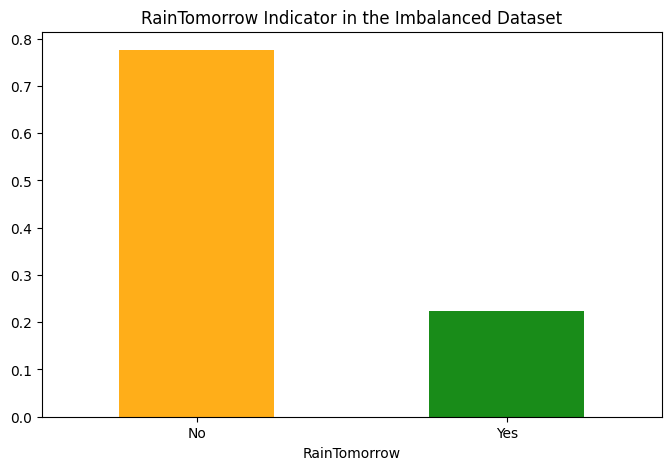

In [9]:
fig = plt.figure(figsize = (8,5))
rain_data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['orange','green'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator in the Imbalanced Dataset')
plt.show()

###Handling Class Imbalance For Rainfall Prediction

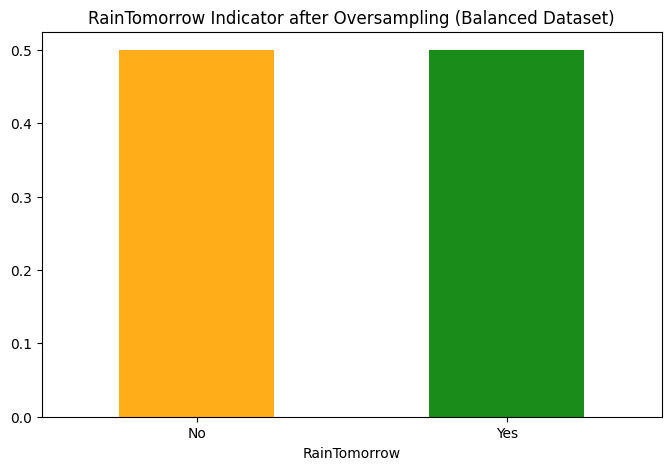

In [10]:
# Split the dataset into majority (No) and minority (Yes)
no = rain_data[rain_data.RainTomorrow == 'No']
yes = rain_data[rain_data.RainTomorrow == 'Yes']

# Oversample the minority class
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)

# Combine to create a balanced dataset
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize=(8, 5))
oversampled.RainTomorrow.value_counts(normalize=True).plot(
    kind='bar',
    color=['orange', 'green'],
    alpha=0.9,
    rot=0
)
plt.title('RainTomorrow Indicator after Oversampling (Balanced Dataset)')
plt.show()


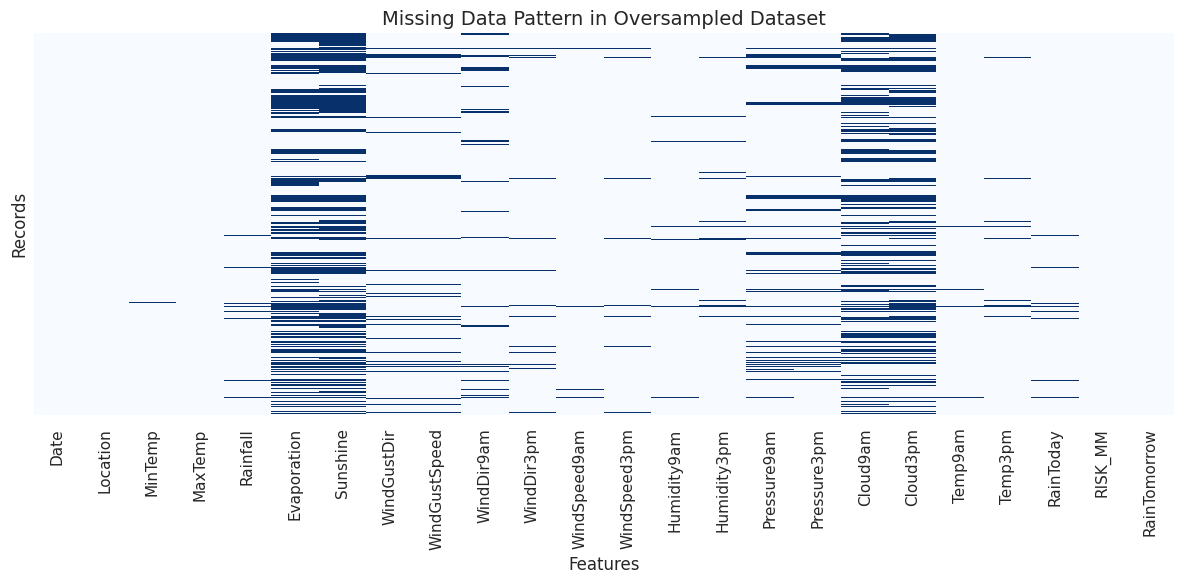

In [11]:
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.heatmap(oversampled.isnull(),
            cbar=False,
            cmap='Blues',
            yticklabels=False)

plt.title('Missing Data Pattern in Oversampled Dataset', fontsize=14)
plt.xlabel('Features')
plt.ylabel('Records')
plt.tight_layout()
plt.show()


In [12]:
# Calculating the total and percentage of missing values
missing_total = oversampled.isnull().sum()
missing_percent = (missing_total / len(oversampled)) * 100

# Combine into a single DataFrame
missing_data = pd.DataFrame({
    'Total Missing': missing_total,
    'Percent Missing': missing_percent.round(2)
})

missing_data_sorted = missing_data.sort_values(by='Total Missing', ascending=False)
missing_data_sorted.head(4)


Total Missing  Percent Missing
Sunshine            104831            47.51
Evaporation          95411            43.24
Cloud3pm             85614            38.80
Cloud9am             81339            36.87

###Imputation and Transformation

In [13]:
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [14]:
# List of categorical columns to impute with mode
categorical_cols = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

# Impute each column with its mode
for col in categorical_cols:
    oversampled[col] = oversampled[col].fillna(oversampled[col].mode()[0])

In [15]:
# Initialize dictionary to store label encoders
label_encoders = {}

categorical_columns = oversampled.select_dtypes(include='object').columns

# Applying Label Encoding
for col in categorical_columns:
    encoder = LabelEncoder()
    oversampled[col] = encoder.fit_transform(oversampled[col])
    label_encoders[col] = encoder


In [16]:
# Making a deep copy of the dataset
mice_imputed = oversampled.copy(deep=True)

# Initialize the Iterative Imputer
imputer = IterativeImputer(random_state=42)

# Apply imputation
mice_imputed.iloc[:, :] = imputer.fit_transform(mice_imputed)


In [17]:
# Detecting the outliers with IQR
Q1 = mice_imputed.quantile(0.25)
Q3 = mice_imputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1535.000000
Location           25.000000
MinTemp             9.300000
MaxTemp            10.200000
Rainfall            2.600000
Evaporation         4.104164
Sunshine            5.947627
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.800000
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.680056
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RISK_MM             5.200000
RainTomorrow        1.000000
dtype: float64


In [18]:
# Removing the outliers from the dataset
mice_imputed = mice_imputed[~((mice_imputed < (Q1 - 1.5 * IQR)) |(mice_imputed > (Q3 + 1.5 * IQR))).any(axis=1)]
mice_imputed.shape

(156082, 24)

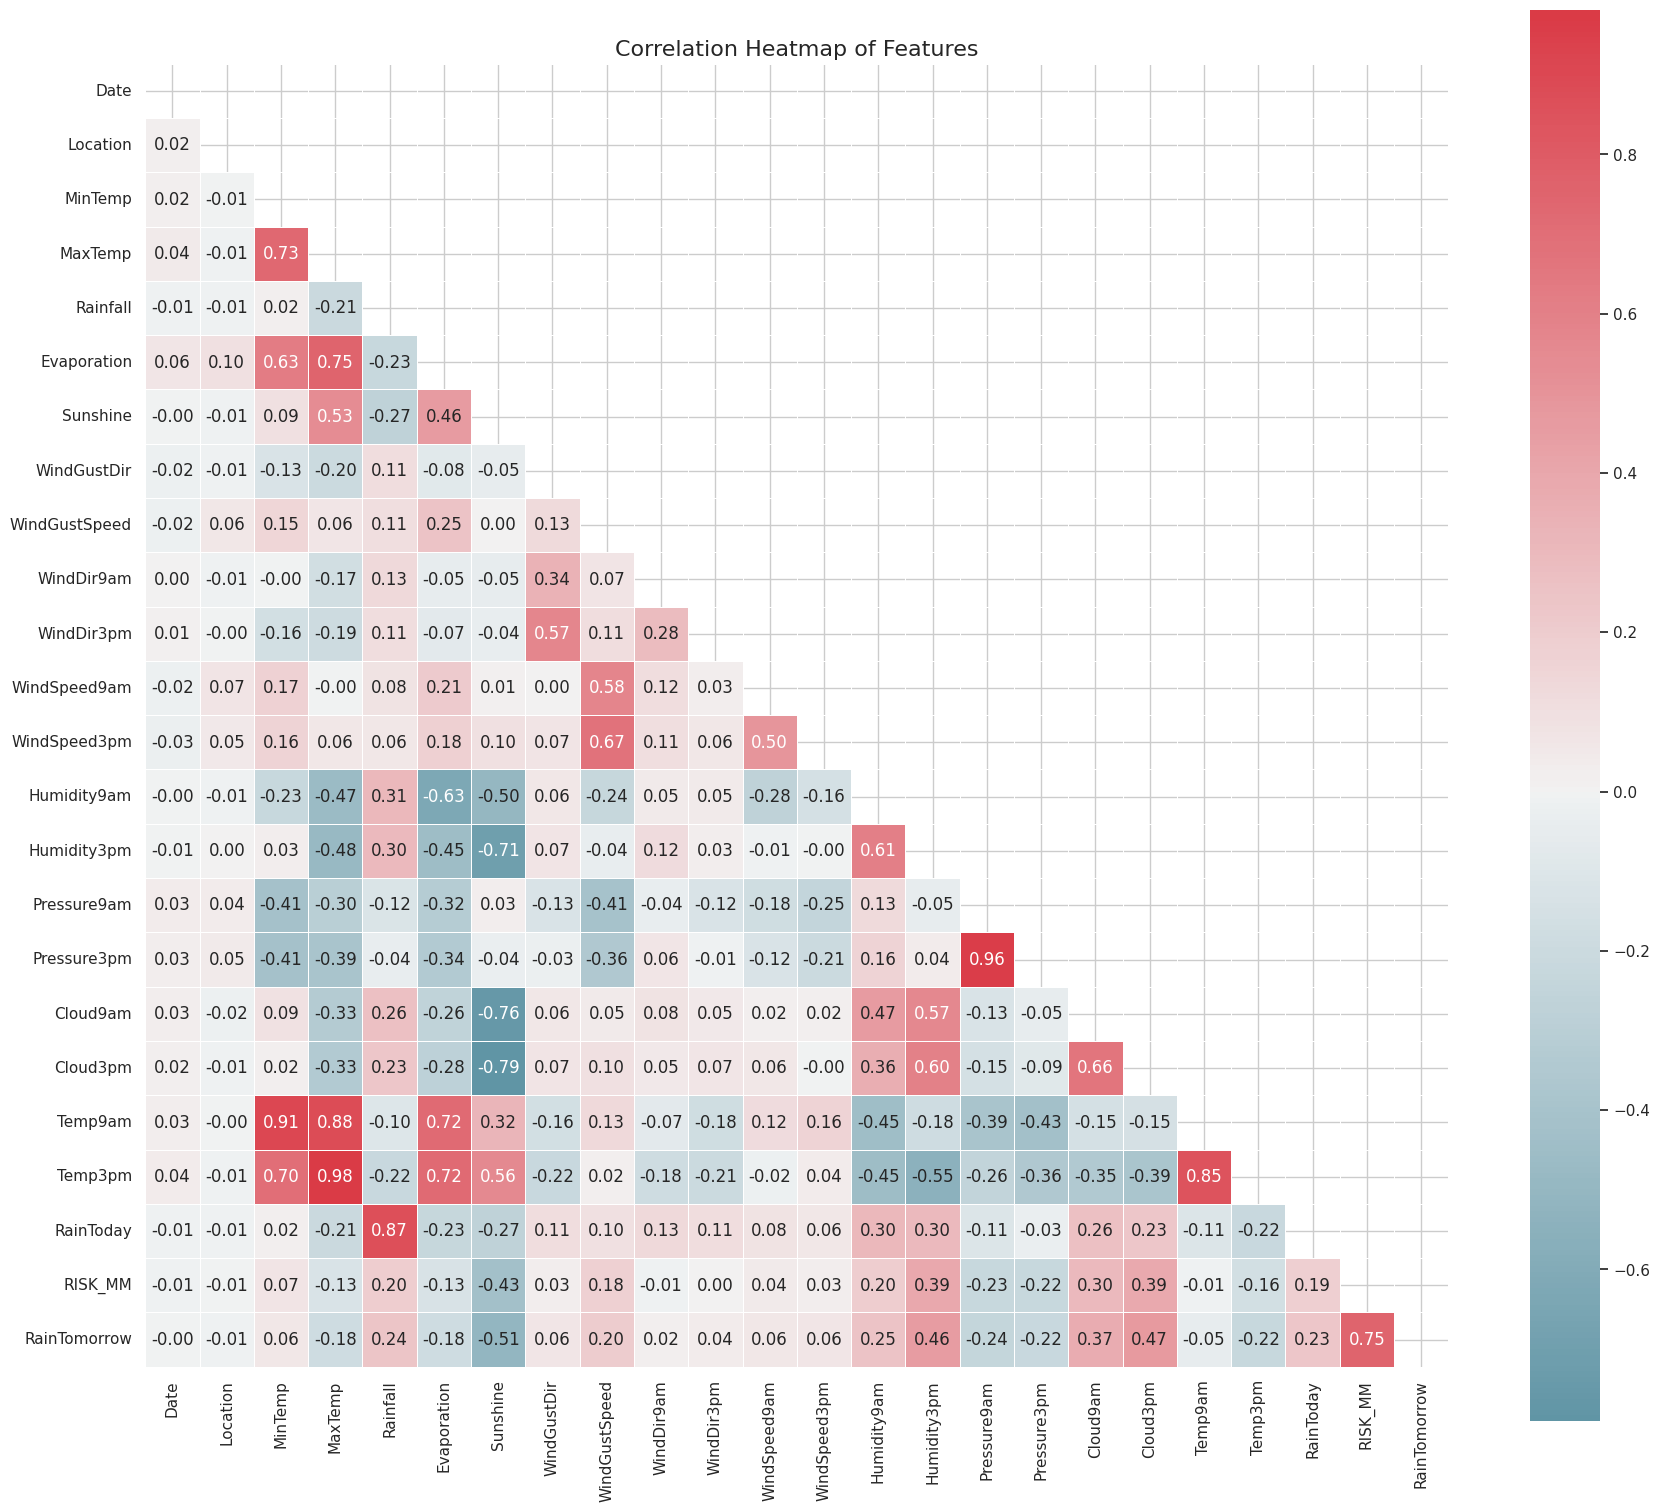

In [19]:
corr_matrix = mice_imputed.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(18, 18))

# Generate a diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title('Correlation Heatmap of Features', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


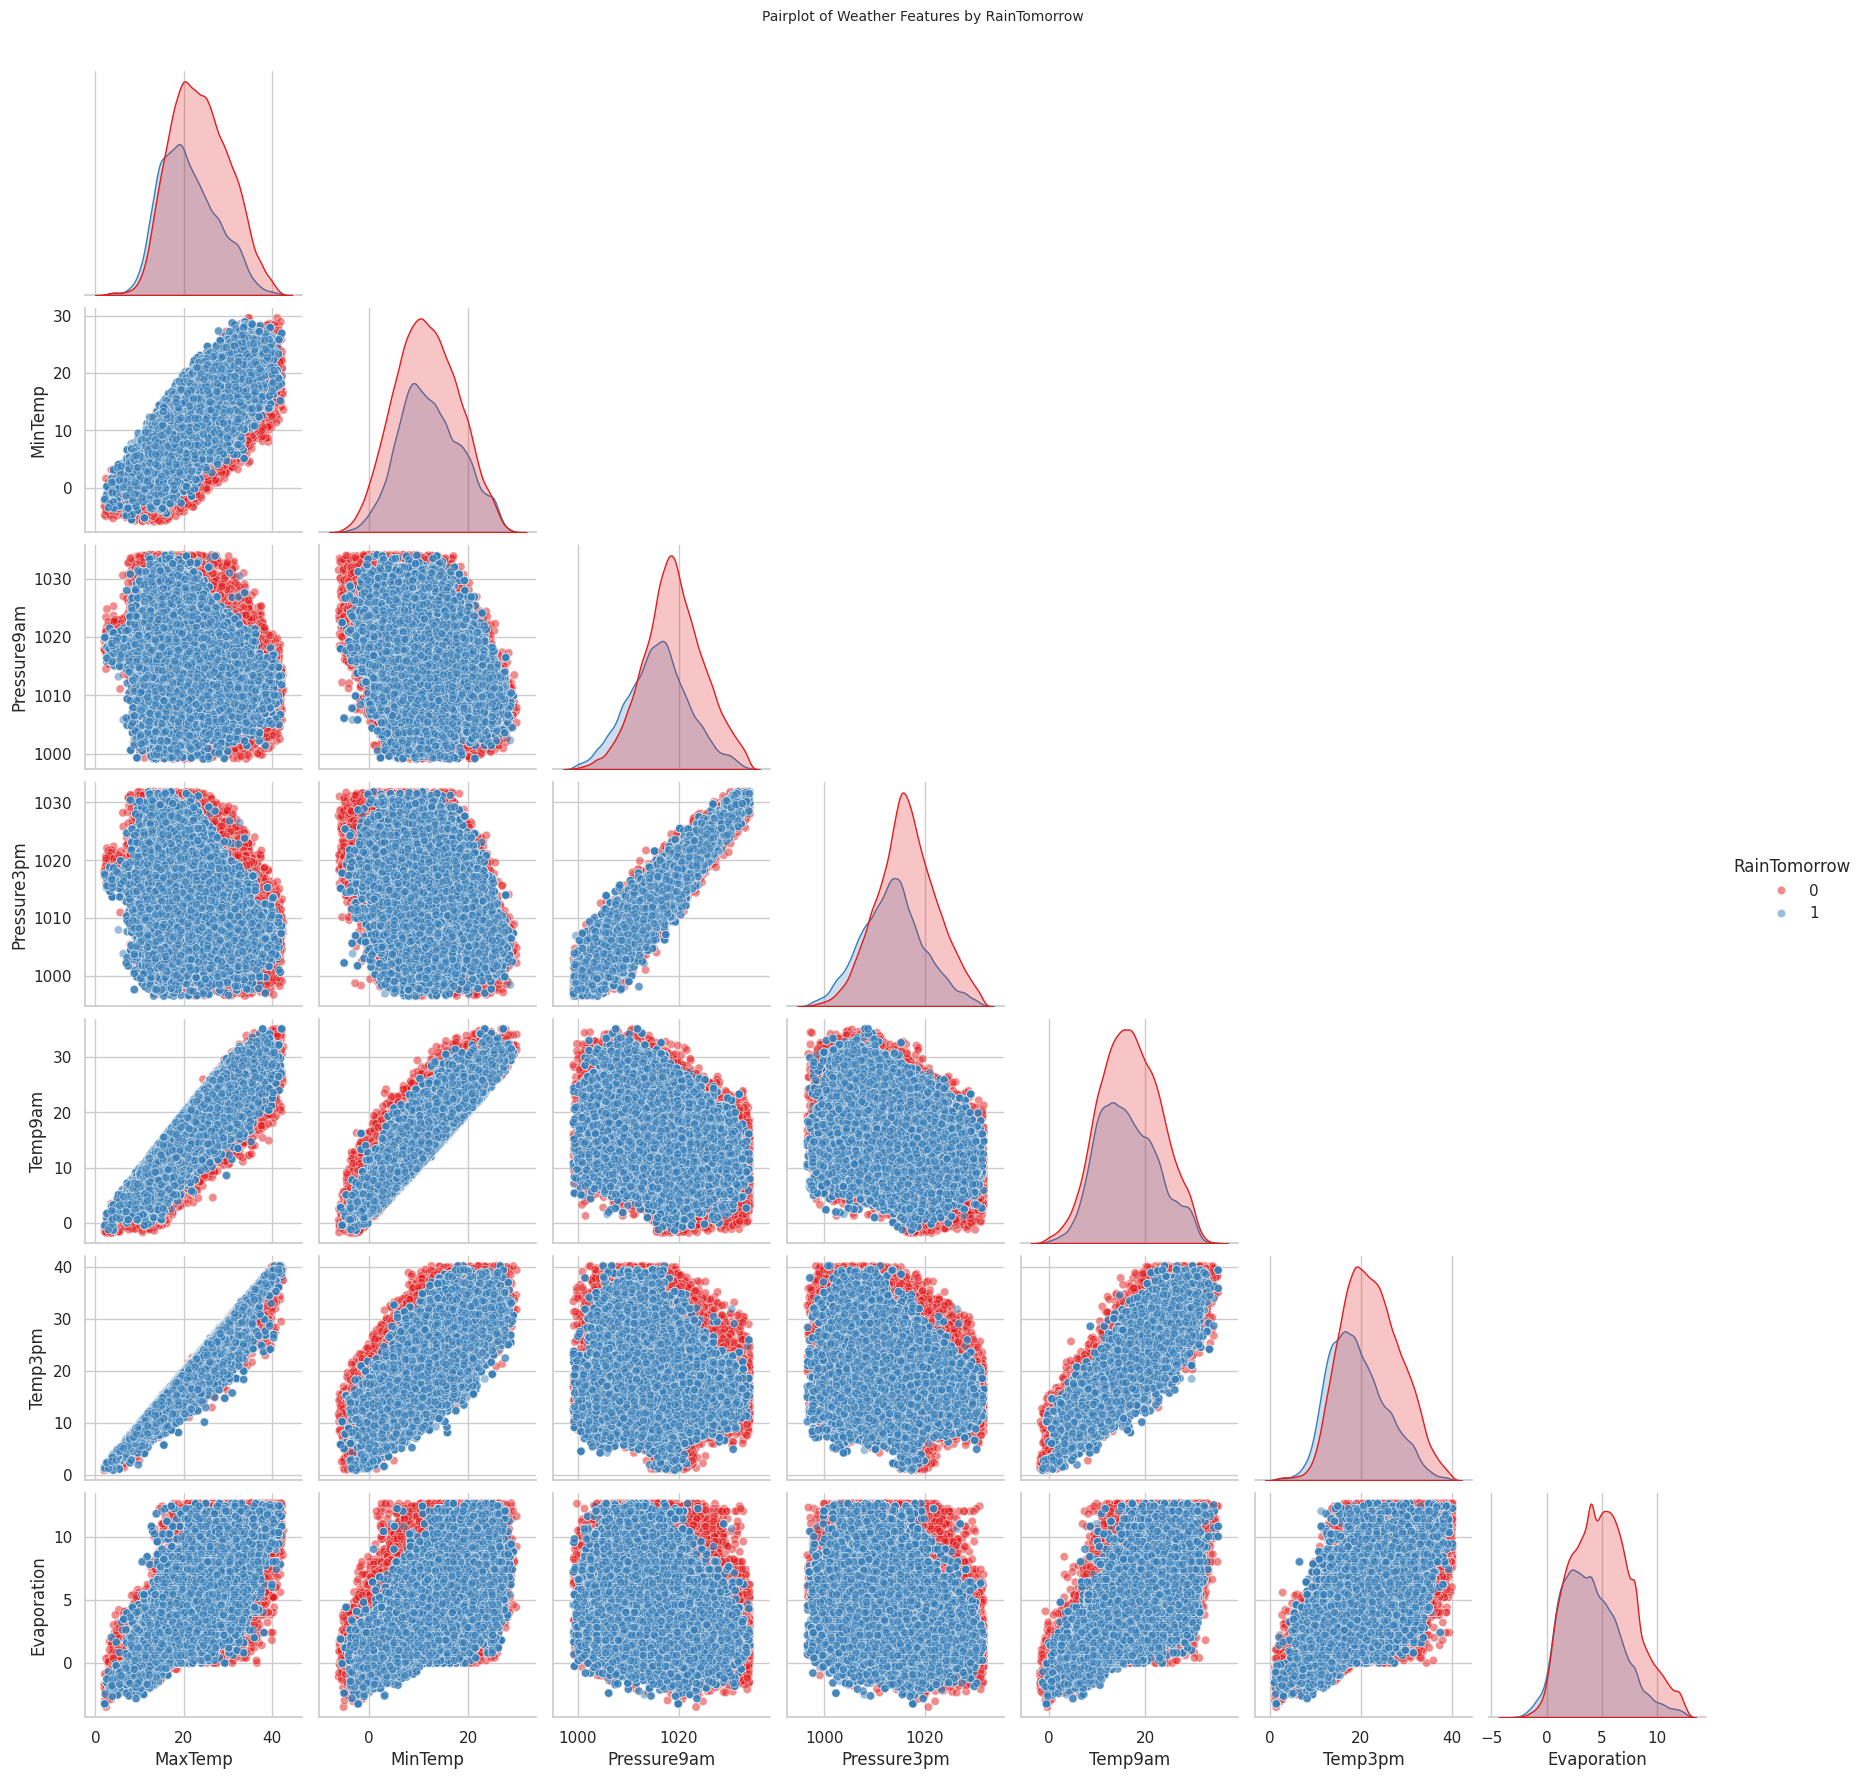

In [21]:
# Defining the variables to plot
plot_vars = ['MaxTemp', 'MinTemp', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation']

# Creating the pairplot
sns.pairplot(
    data=mice_imputed,
    vars=plot_vars,
    hue='RainTomorrow',
    corner=True,
    plot_kws={'alpha': 0.5},
    diag_kws={'fill': True},
    palette='Set1',

)

plt.suptitle('Pairplot of Weather Features by RainTomorrow', y=1.02, fontsize=10)
plt.show()

###Feature Selection for the Rainfall Prediction

In [22]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler only on numeric columns to avoid errors
numeric_cols = mice_imputed.select_dtypes(include=['float64', 'int64']).columns

# Fit and transform numeric data
scaled_array = scaler.fit_transform(mice_imputed[numeric_cols])

# Create a new DataFrame with scaled numeric features
modified_data = mice_imputed.copy()
modified_data[numeric_cols] = pd.DataFrame(scaled_array, index=mice_imputed.index, columns=numeric_cols)


In [23]:
# Define features and target
X = modified_data.drop(columns='RainTomorrow')
y = modified_data['RainTomorrow']

# Initialize SelectKBest with chi2, selecting top 10 features
selector = SelectKBest(score_func=chi2, k=10)

# Fit selector to the data
selector.fit(X, y)

X_new = selector.transform(X)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

print("Top 10 features selected by Chi-Square test:")
print(selected_features.tolist())


Top 10 features selected by Chi-Square test:
['Rainfall', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RISK_MM']


In [24]:
# Define features and target
X = mice_imputed.drop(columns='RainTomorrow')
y = mice_imputed['RainTomorrow']

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model for feature selection
selector = SelectFromModel(rf_model)
selector.fit(X, y)

# Get selected features
selected_features = X.columns[selector.get_support()].tolist()
print("Selected features by Random Forest importance:")
print(selected_features)

# Fitting RF again to get feature importances
rf_model.fit(X, y)
print("Feature importances:")
print(dict(zip(X.columns, rf_model.feature_importances_)))


Selected features by Random Forest importance:
['Sunshine', 'Cloud3pm', 'RISK_MM']
Feature importances:
{'Date': np.float64(0.0023204670552221234), 'Location': np.float64(0.0024756588977625773), 'MinTemp': np.float64(0.0030284042236852294), 'MaxTemp': np.float64(0.0035858607062459608), 'Rainfall': np.float64(0.01059435609608419), 'Evaporation': np.float64(0.002963768041046079), 'Sunshine': np.float64(0.058720537039637914), 'WindGustDir': np.float64(0.0015567625691876865), 'WindGustSpeed': np.float64(0.0071741581710370005), 'WindDir9am': np.float64(0.0019422350912280642), 'WindDir3pm': np.float64(0.0018376946329802673), 'WindSpeed9am': np.float64(0.001582840889272309), 'WindSpeed3pm': np.float64(0.0020109160791674926), 'Humidity9am': np.float64(0.007783016844870317), 'Humidity3pm': np.float64(0.03409336061806611), 'Pressure9am': np.float64(0.009581488932271207), 'Pressure3pm': np.float64(0.013640856382626089), 'Cloud9am': np.float64(0.01935674593693768), 'Cloud3pm': np.float64(0.0567095

###Training Rainfall Prediction Model with Different Models

In [25]:
# Select features and target
features = mice_imputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                        'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
                        'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                        'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
target = mice_imputed['RainTomorrow']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Initialize scaler
scaler = StandardScaler()

# Fit scaler on training data and transform both train and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
def plot_roc_curve(fpr, tpr, auc_score=None):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', label='ROC curve')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Random guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    if auc_score is not None:
        plt.legend(title=f'AUC = {auc_score:.2f}')
    else:
        plt.legend()
    plt.grid(True)
    plt.show()


In [27]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()

    # Fit the model
    if hasattr(model, 'verbose') and not verbose:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)

    # Predictions and metrics
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # For ROC-AUC, using probabilities or decision function if available, else fallback to predictions
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, probs)
    elif hasattr(model, "decision_function"):
        probs = model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, probs)
    else:
        roc_auc = roc_auc_score(y_test, y_pred)


    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time() - t0

    print(f"Accuracy = {accuracy:.5f}")
    print(f"ROC Area under Curve = {roc_auc:.5f}")
    print(f"Cohen's Kappa = {coh_kap:.5f}")
    print(f"Time taken = {time_taken:.2f} seconds\n")
    print(classification_report(y_test, y_pred, digits=5))

    fper, tper, _ = roc_curve(y_test, probs)
    plot_roc_curve(fper, tper, auc_score=roc_auc)

    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
    plt.title('Normalized Confusion Matrix')
    plt.show()

    return model, accuracy, roc_auc, coh_kap, time_taken


Training and evaluating: Logistic Regression
Accuracy = 0.78952
ROC Area under Curve = 0.86590
Cohen's Kappa = 0.54809
Time taken = 3.32 seconds

              precision    recall  f1-score   support

           0    0.80739   0.86159   0.83361     23878
           1    0.75591   0.67589   0.71366     15143

    accuracy                        0.78952     39021
   macro avg    0.78165   0.76874   0.77363     39021
weighted avg    0.78741   0.78952   0.78706     39021



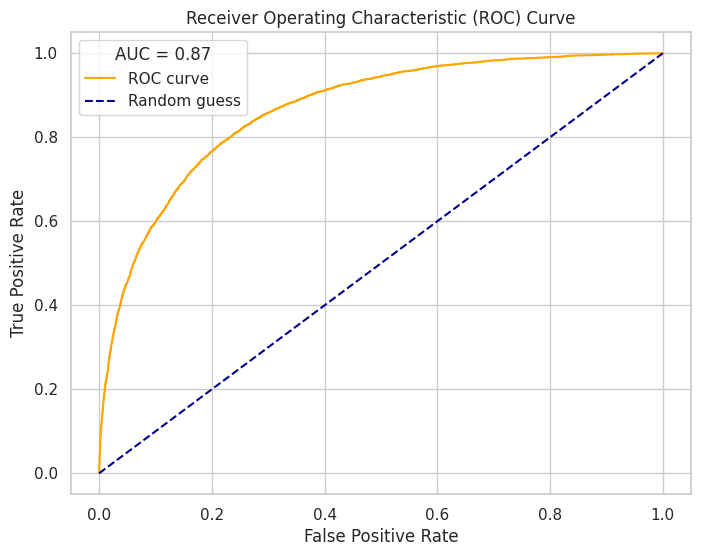

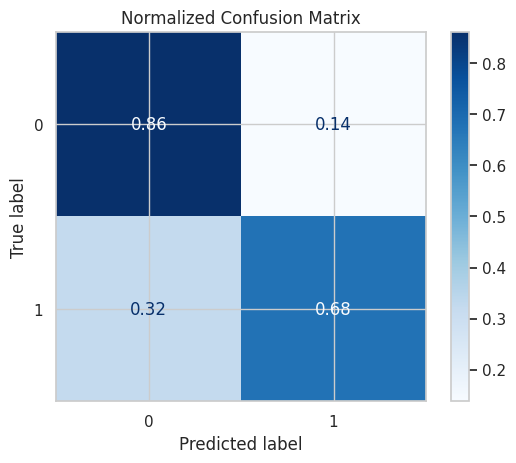


Training and evaluating: Decision Tree
Accuracy = 0.87773
ROC Area under Curve = 0.92152
Cohen's Kappa = 0.74670
Time taken = 0.48 seconds

              precision    recall  f1-score   support

           0    0.92413   0.87176   0.89718     23878
           1    0.81438   0.88714   0.84921     15143

    accuracy                        0.87773     39021
   macro avg    0.86925   0.87945   0.87319     39021
weighted avg    0.88154   0.87773   0.87856     39021



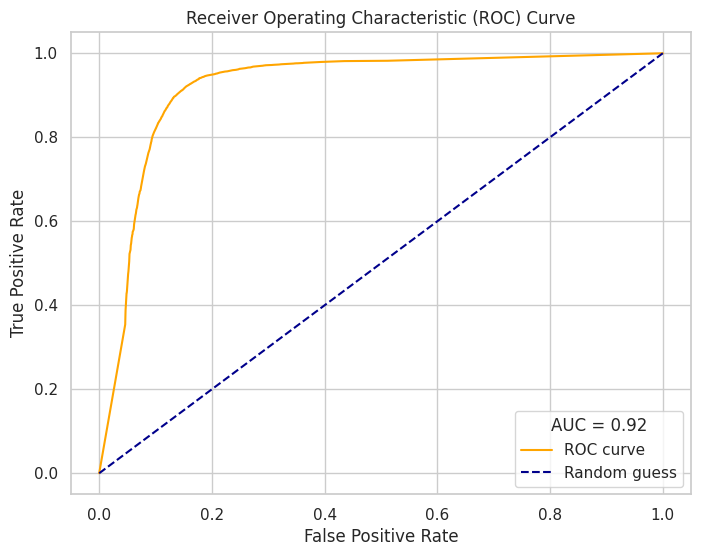

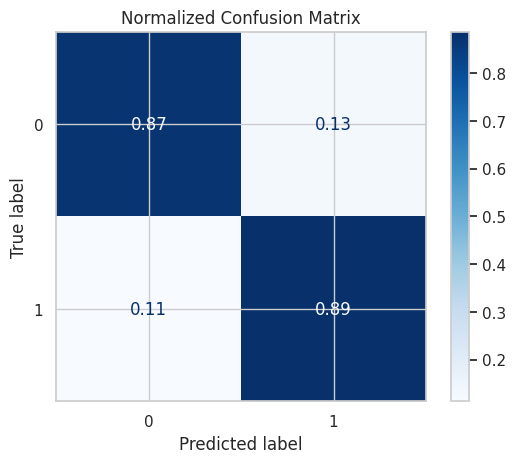


Training and evaluating: Neural Network
Accuracy = 0.88906
ROC Area under Curve = 0.96036
Cohen's Kappa = 0.76633
Time taken = 414.94 seconds

              precision    recall  f1-score   support

           0    0.90886   0.90996   0.90941     23878
           1    0.85775   0.85611   0.85693     15143

    accuracy                        0.88906     39021
   macro avg    0.88330   0.88303   0.88317     39021
weighted avg    0.88902   0.88906   0.88904     39021



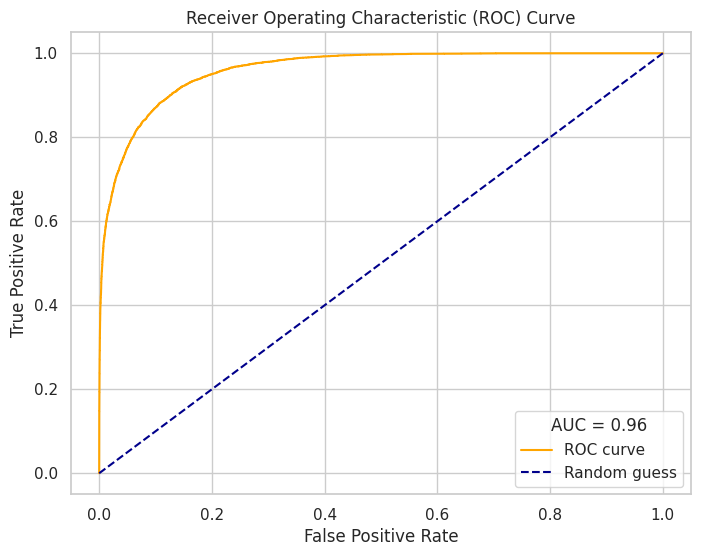

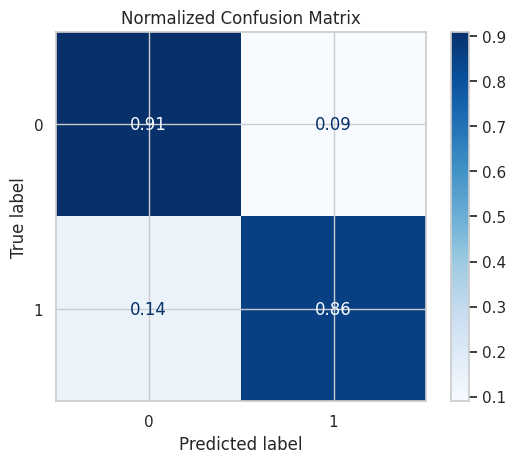


Training and evaluating: Random Forest
Accuracy = 0.93965
ROC Area under Curve = 0.98450
Cohen's Kappa = 0.87393
Time taken = 39.41 seconds

              precision    recall  f1-score   support

           0    0.96344   0.93693   0.95000     23878
           1    0.90468   0.94393   0.92389     15143

    accuracy                        0.93965     39021
   macro avg    0.93406   0.94043   0.93695     39021
weighted avg    0.94064   0.93965   0.93987     39021



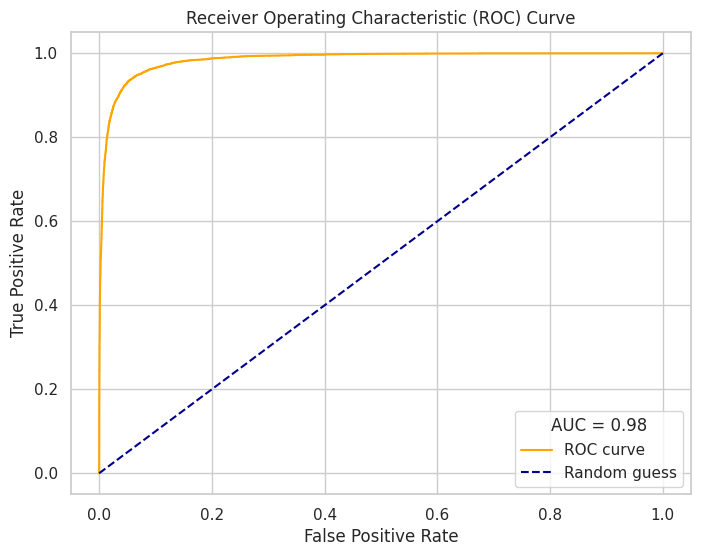

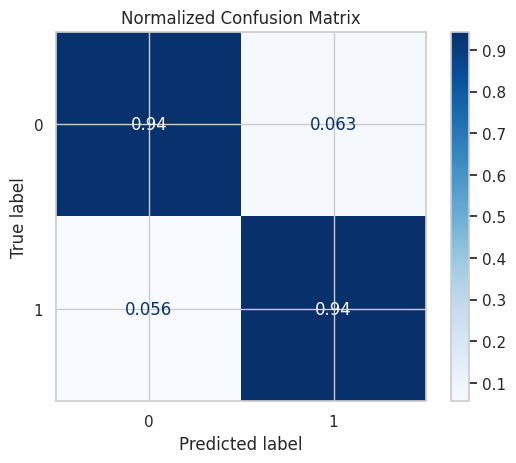


Training and evaluating: LightGBM
[LightGBM] [Info] Number of positive: 45611, number of negative: 71450
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3864
[LightGBM] [Info] Number of data points in the train set: 117061, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.389634 -> initscore=-0.448849
[LightGBM] [Info] Start training from score -0.448849
Accuracy = 0.88463
ROC Area under Curve = 0.95444
Cohen's Kappa = 0.75715
Time taken = 8.00 seconds

              precision    recall  f1-score   support

           0    0.90614   0.90523   0.90568     23878
           1    0.85079   0.85214   0.85147     15143

    accuracy                        0.88463     39021
   macro avg    0.87847   0.87868   0.87857     39021
weighted avg    0.88466   0.88463   0.88464     39021



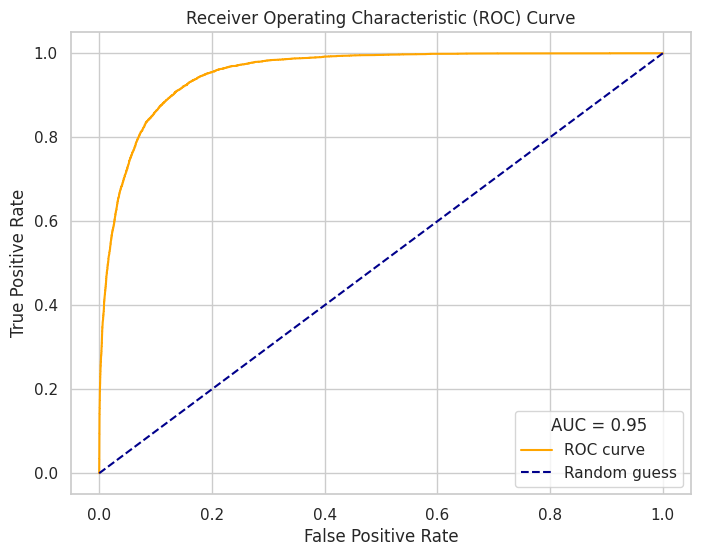

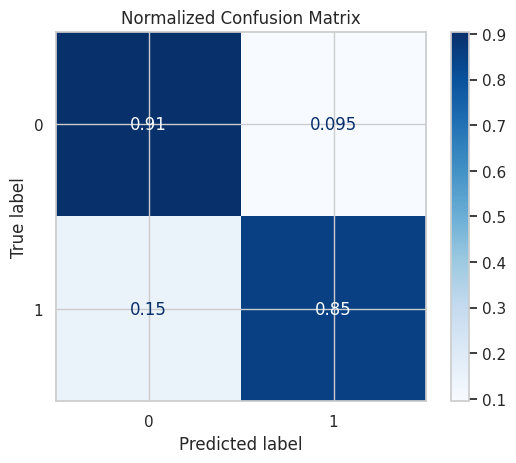


Training and evaluating: CatBoost
Accuracy = 0.95382
ROC Area under Curve = 0.98915
Cohen's Kappa = 0.90399
Time taken = 225.69 seconds

              precision    recall  f1-score   support

           0    0.98357   0.94024   0.96142     23878
           1    0.91189   0.97524   0.94250     15143

    accuracy                        0.95382     39021
   macro avg    0.94773   0.95774   0.95196     39021
weighted avg    0.95575   0.95382   0.95407     39021



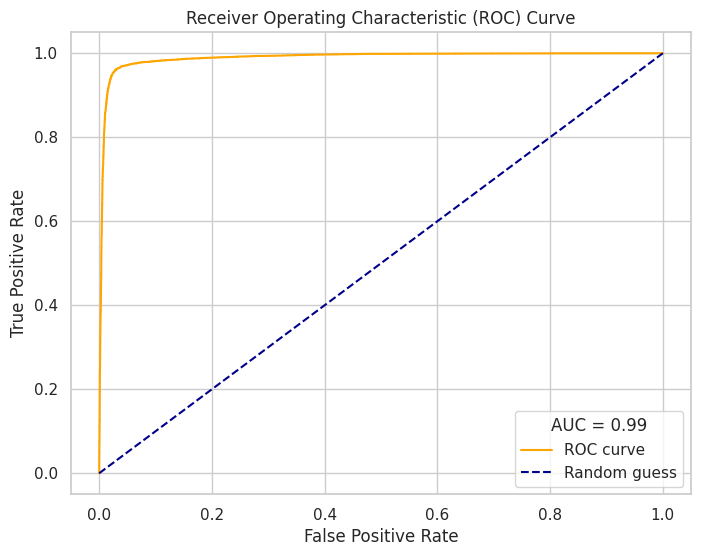

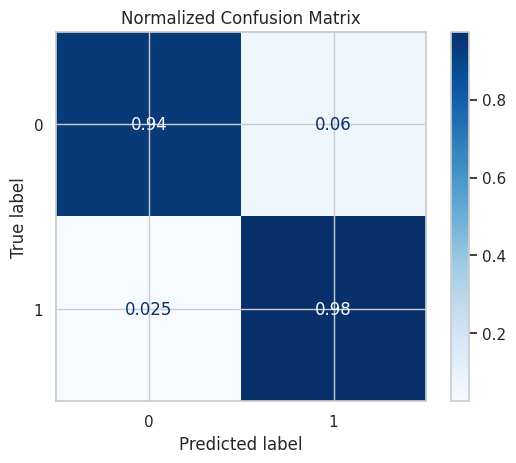


Training and evaluating: XGBoost
Accuracy = 0.96615
ROC Area under Curve = 0.99433
Cohen's Kappa = 0.92929
Time taken = 29.76 seconds

              precision    recall  f1-score   support

           0    0.98591   0.95837   0.97195     23878
           1    0.93713   0.97841   0.95732     15143

    accuracy                        0.96615     39021
   macro avg    0.96152   0.96839   0.96463     39021
weighted avg    0.96698   0.96615   0.96627     39021



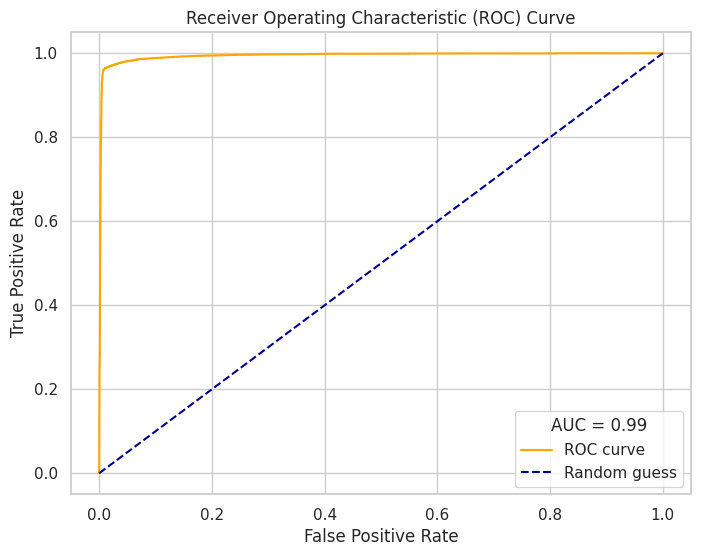

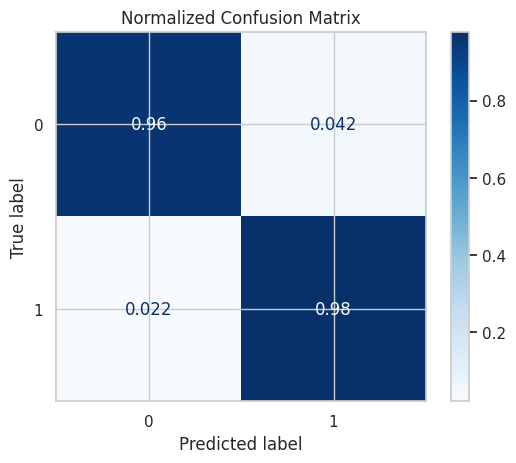

In [28]:
models = {
    'Logistic Regression': LogisticRegression(penalty='l1', solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(max_depth=16, max_features="sqrt"),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(30,30,30), activation='logistic', solver='lbfgs', max_iter=500),
    'Random Forest': RandomForestClassifier(max_depth=16, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=12345),
    'LightGBM': lgb.LGBMClassifier(colsample_bytree=0.95, max_depth=16, min_split_gain=0.1, n_estimators=200, num_leaves=50, reg_alpha=1.2, reg_lambda=1.2, subsample=0.95, subsample_freq=20),
    'CatBoost': cb.CatBoostClassifier(iterations=50, max_depth=16, verbose=0),
    'XGBoost': xgb.XGBClassifier(n_estimators=500, max_depth=16)
}

results = {}

for name, model in models.items():
    print(f"\nTraining and evaluating: {name}")
    verbose_flag = False if name == 'CatBoost' else True
    fitted_model, accuracy, roc_auc, coh_kappa, time_taken = run_model(model, X_train, y_train, X_test, y_test, verbose=verbose_flag)
    results[name] = {
        'model': fitted_model,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'cohen_kappa': coh_kappa,
        'time_taken': time_taken
    }


###Plotting the Decision Region for all Models

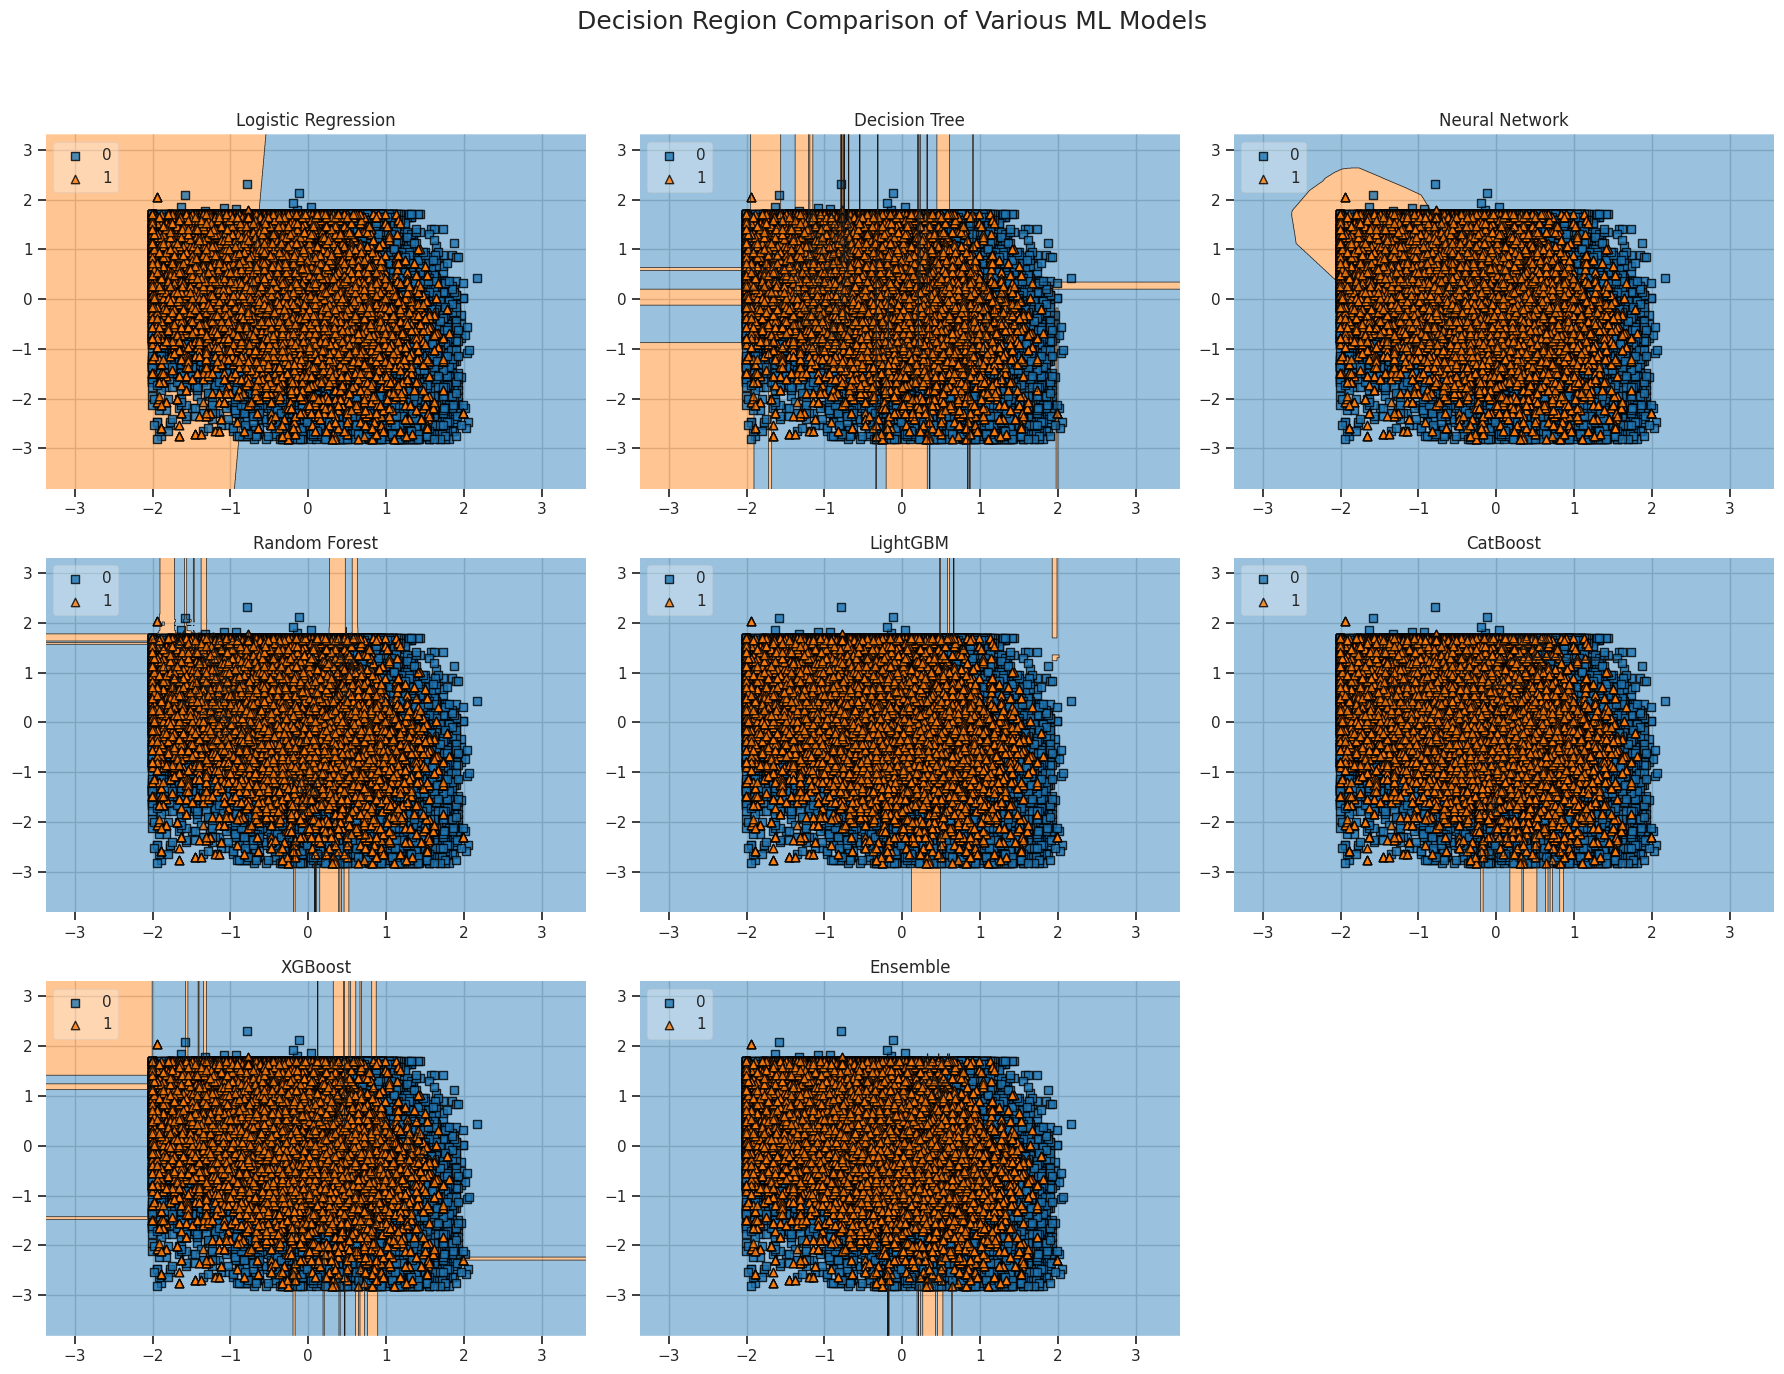

In [29]:
# Selected Features
X_list = mice_imputed[["Sunshine", "Humidity9am", "Cloud3pm"]]
y_list = mice_imputed["RainTomorrow"]

X = np.asarray(X_list, dtype=np.float32)
y = np.asarray(y_list, dtype=np.int32)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Classifiers
clf1 = LogisticRegression(random_state=12345)
clf2 = DecisionTreeClassifier(random_state=12345)
clf3 = MLPClassifier(random_state=12345, verbose=0)
clf4 = RandomForestClassifier(random_state=12345)
clf5 = lgb.LGBMClassifier(random_state=12345, verbose=-1)
clf6 = cb.CatBoostClassifier(random_state=12345, verbose=0)
clf7 = xgb.XGBClassifier(random_state=12345, use_label_encoder=False, eval_metric='logloss')
eclf = EnsembleVoteClassifier(clfs=[clf4, clf5, clf6, clf7], weights=[1, 1, 1, 1], voting='soft')

# Plot Settings
gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize=(18, 14))
plt.suptitle("Decision Region Comparison of Various ML Models", fontsize=18)

labels = [
    'Logistic Regression', 'Decision Tree', 'Neural Network',
    'Random Forest', 'LightGBM', 'CatBoost', 'XGBoost', 'Ensemble'
]

models = [clf1, clf2, clf3, clf4, clf5, clf6, clf7, eclf]

# Plot Decision Boundaries
for clf, label, grd in zip(models, labels, itertools.product([0, 1, 2], repeat=2)):
    clf.fit(X_scaled, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(
        X=X_scaled, y=y, clf=clf,
        filler_feature_values={2: 0},   # mean after scaling
        filler_feature_ranges={2: 1},
        legend=2
    )
    plt.title(label)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Comparison of Rainfall Prediction Models

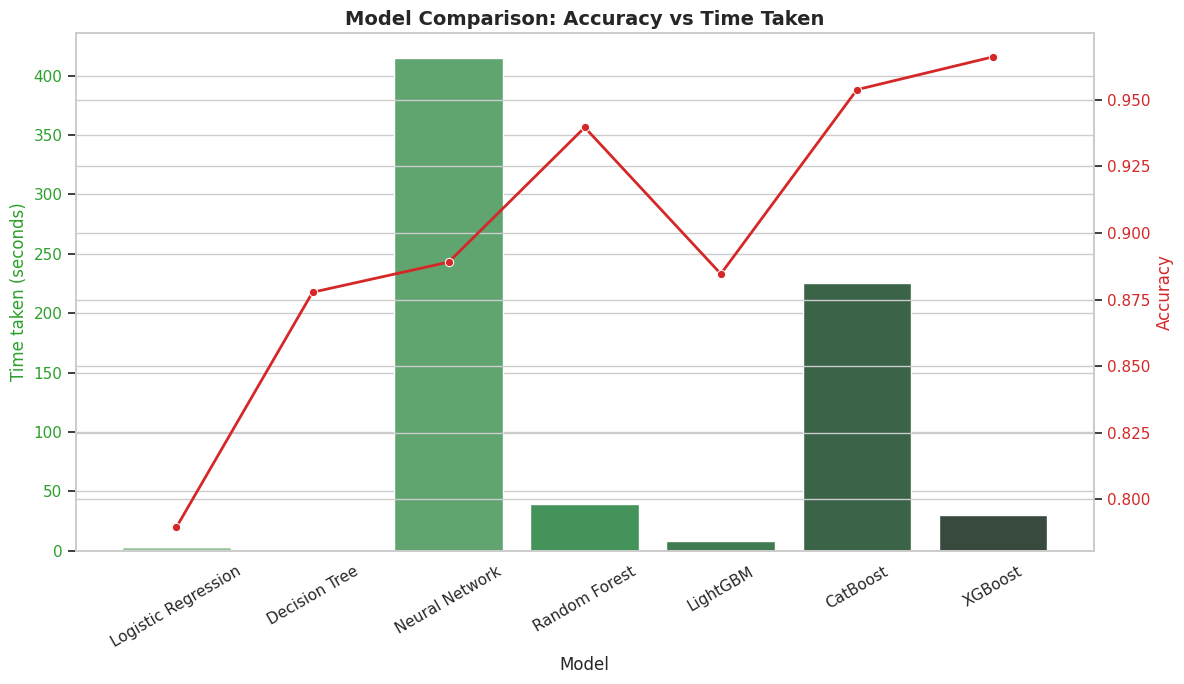

In [34]:
# Creating the model performance DataFrame
model_names = ['Logistic Regression', 'Decision Tree', 'Neural Network',
              'Random Forest', 'LightGBM', 'CatBoost', 'XGBoost']

accuracy_scores = [results[name]['accuracy'] for name in model_names]
roc_auc_scores = [results[name]['roc_auc'] for name in model_names]
coh_kap_scores = [results[name]['cohen_kappa'] for name in model_names]
tt = [results[name]['time_taken'] for name in model_names]

model_data = {
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'ROC_AUC': roc_auc_scores,
    'Cohen_Kappa': coh_kap_scores,
    'Time taken (s)': tt
}
data = pd.DataFrame(model_data)

sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(12, 7))

# Bar plot for time taken
color1 = 'tab:green'
sns.barplot(x='Model', y='Time taken (s)', data=data, ax=ax1, palette='Greens_d')
ax1.set_ylabel('Time taken (seconds)', fontsize=12, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xlabel('Model', fontsize=12)
ax1.set_title('Model Comparison: Accuracy vs Time Taken', fontsize=14, fontweight='bold')
plt.xticks(rotation=30)

# Secondary axis for accuracy
ax2 = ax1.twinx()
color2 = 'tab:red'
sns.lineplot(x='Model', y='Accuracy', data=data, ax=ax2, color=color2, marker='o', linewidth=2)
ax2.set_ylabel('Accuracy', fontsize=12, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.tight_layout()
plt.show()

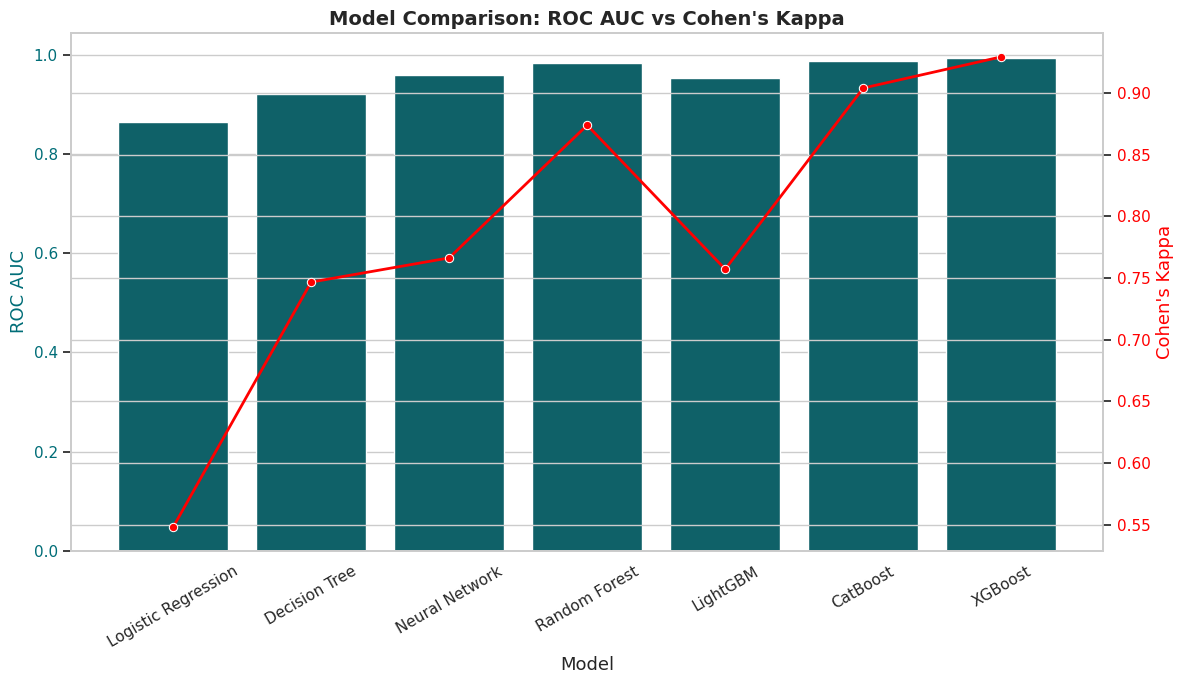

In [35]:
sns.set_style("whitegrid")

fig, ax3 = plt.subplots(figsize=(12, 7))
ax3.set_title('Model Comparison: ROC AUC vs Cohen\'s Kappa', fontsize=14, fontweight='bold')

bar_color = '#006d77'
sns.barplot(x='Model', y='ROC_AUC', data=data, ax=ax3, color=bar_color)
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC AUC', fontsize=13, color=bar_color)
ax3.tick_params(axis='y', labelcolor=bar_color)
plt.xticks(rotation=30)

line_color = '#FF0000'
ax4 = ax3.twinx()
sns.lineplot(x='Model', y='Cohen_Kappa', data=data, ax=ax4, color=line_color, marker='o', linewidth=2)
ax4.set_ylabel("Cohen's Kappa", fontsize=13, color=line_color)
ax4.tick_params(axis='y', labelcolor=line_color)

plt.tight_layout()
plt.show()
